In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [3]:
data = pd.read_csv('merged-data-COMBINED-WOL.csv')

grouped_data_b = data.groupby('Basket_ID')['CategoryBDescription'].apply(lambda x: ', '.join(x)).reset_index()
grouped_data_b = grouped_data_b.rename(columns={'CategoryBDescription': 'items bought'})

print(grouped_data_b)

        Basket_ID                                       items bought
0      1089674689  products thatn expire soon, Detergents, Grocer...
1      1089674690               DAIRY PRODUCTS, Deli and canned food
2      1089674691  Grocery Food, Deli and canned food, Grocery Fo...
3      1089674702  Grocery Food, Grocery Food, products thatn exp...
4      1089674706           products thatn expire soon, Grocery Food
...           ...                                                ...
32634  1109175665                                       Grocery Food
32635  1109175668  Grocery Food, products thatn expire soon, DRIN...
32636  1109175670         traditional butchery, traditional butchery
32637  1109175672  products thatn expire soon, DAIRY PRODUCTS, ba...
32638  1109175674  fruits and vegetables, fruits and vegetables, ...

[32639 rows x 2 columns]


In [4]:
item_pairs = {}


for index, row in grouped_data_b.iterrows():
    
    
    items_list = row['items bought'].split(', ')
    
    
    for i in range(len(items_list)-1):
        item_pair = tuple(sorted([items_list[i], items_list[i+1]]))
        if item_pair in item_pairs:
            item_pairs[item_pair] += 1
        else:
            item_pairs[item_pair] = 1


for item_pair, weight in item_pairs.items():
    print(f"{item_pair}: {weight}")

('Detergents', 'products thatn expire soon'): 1965
('Detergents', 'Grocery Food'): 7848
('Grocery Food', 'Grocery Food'): 18149
('DAIRY PRODUCTS', 'Deli and canned food'): 677
('Deli and canned food', 'Grocery Food'): 1536
('Grocery Food', 'products thatn expire soon'): 6132
('products thatn expire soon', 'products thatn expire soon'): 2587
('DAIRY PRODUCTS', 'products thatn expire soon'): 2196
('DAIRY PRODUCTS', 'Grocery Food'): 5631
('Grocery Food', 'household'): 1451
('DAIRY PRODUCTS', 'household'): 304
('DAIRY PRODUCTS', 'DAIRY PRODUCTS'): 1118
('DAIRY PRODUCTS', 'Detergents'): 1660
('Grocery Food', 'traditional butchery'): 1308
('traditional butchery', 'traditional butchery'): 491
('Grocery Food', 'frozen'): 1901
('Detergents', 'Detergents'): 4499
('Grocery Food', 'fruits and vegetables'): 6405
('Deli and canned food', 'fruits and vegetables'): 439
('DRINKS', 'Grocery Food'): 5837
('Detergents', 'fruits and vegetables'): 1746
('DAIRY PRODUCTS', 'DRINKS'): 924
('COLD CUTS', 'DAIRY 

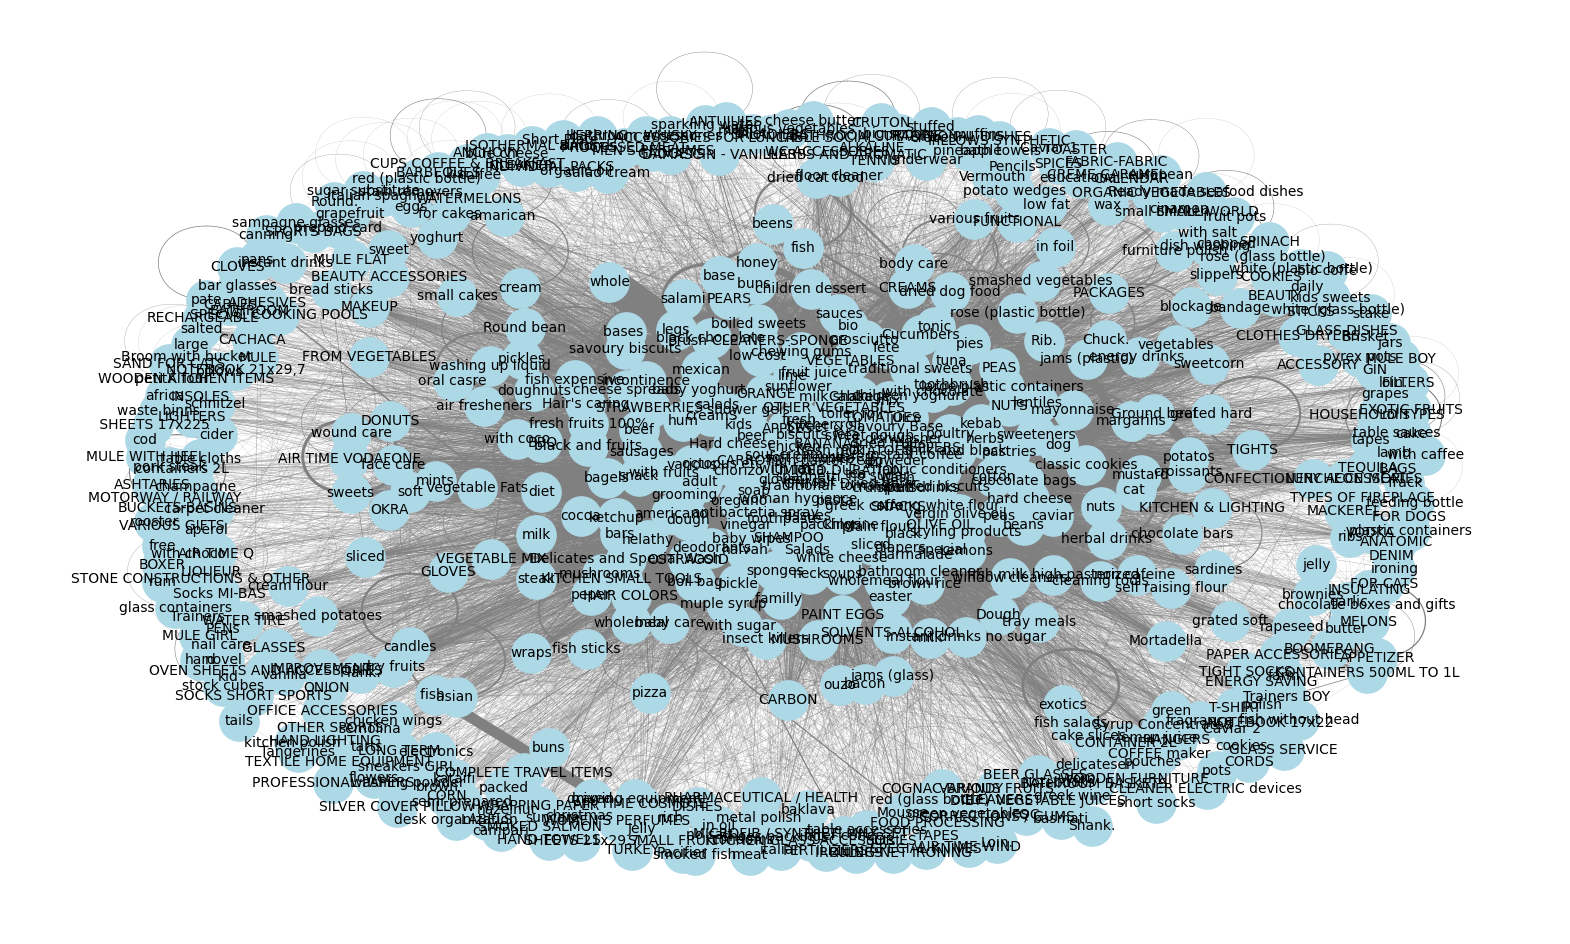

In [10]:
G = nx.Graph()

for pair, weight in item_pairs.items():
    G.add_edge(pair[0], pair[1], weight=weight)


pos = nx.spring_layout(G,k=1.8)

plt.figure(figsize=(20, 12))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

widths = [G[u][v]['weight']/10 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=widths, edge_color='gray')

plt.axis('off')
plt.show()

In [6]:
data = pd.read_csv('merged-data-COMBINED-WOL.csv')

grouped_data_c = data.groupby('Basket_ID')['CategoryCDescription'].apply(lambda x: ', '.join(x)).reset_index()
grouped_data_c = grouped_data_c.rename(columns={'CategoryCDescription': 'items bought'})

print(grouped_data_c)

        Basket_ID                                       items bought
0      1089674689  FRESH MILK, tisues/sanitary etc, salt - peper ...
1      1089674690                         cheese (packed), cold cuts
2      1089674691    pastry making, cold cuts, pasta, rice, biscuits
3      1089674702  special packed bread, special packed bread, FR...
4      1089674706                               FRESH MILK, bakeries
...           ...                                                ...
32634  1109175665                                             coffee
32635  1109175668    crisps, FRESH MILK, BEVERAGES, tin food - fish 
32636  1109175670                                         lamb, lamb
32637  1109175672                            FRESH MILK, EGGS, bread
32638  1109175674  fresh vegetables, fresh vegetables, fresh frui...

[32639 rows x 2 columns]


In [7]:
item_pairs = {}

for index, row in grouped_data_c.iterrows():
    
    
    items_list = row['items bought'].split(', ')
    
    
    for i in range(len(items_list)-1):
        item_pair = tuple(sorted([items_list[i], items_list[i+1]]))
        if item_pair in item_pairs:
            item_pairs[item_pair] += 1
        else:
            item_pairs[item_pair] = 1


for item_pair, weight in item_pairs.items():
    print(f"{item_pair}: {weight}")

('FRESH MILK', 'tisues/sanitary etc'): 520
('salt - peper - spicies', 'tisues/sanitary etc'): 61
('salt - peper - spicies', 'salt - peper - spicies'): 70
('cheese (packed)', 'cold cuts'): 124
('cold cuts', 'pastry making'): 62
('cold cuts', 'pasta'): 88
('pasta', 'rice'): 101
('biscuits', 'rice'): 31
('special packed bread', 'special packed bread'): 100
('FRESH MILK', 'special packed bread'): 483
('FRESH MILK', 'FRESH MILK'): 1083
('FRESH MILK', 'packed cheese'): 153
('bakeries', 'packed cheese'): 59
('bakeries', 'sugar'): 79
('kitchenware', 'sugar'): 4
('MARGARINS', 'kitchenware'): 5
('MARGARINS', 'tin food - vegetables'): 86
('pasta', 'tin food - vegetables'): 261
('pasta', 'tea - herbal drinks'): 17
('tea - herbal drinks', 'tin food - fish '): 8
('crisps', 'tin food - fish '): 24
('cleaners', 'crisps'): 79
('cleaners', 'rice'): 58
('packed cheese', 'rice'): 17
('FRESH MILK', 'bakeries'): 245
('cheese (counter)', 'cheese (counter)'): 361
('cheese (counter)', 'pastry making'): 113
('b

In [8]:
data = pd.read_csv('merged-data-COMBINED-WOL.csv')

grouped_data_d = data.groupby('Basket_ID')['CategoryDDescription'].apply(lambda x: ', '.join(x)).reset_index()
grouped_data_d = grouped_data_d.rename(columns={'CategoryDDescription': 'items bought'})


print(grouped_data_d)

        Basket_ID                                       items bought
0      1089674689           fresh milk , kitcher roll, salt, cinamon
1      1089674690                              soft cheese , chorizo
2      1089674691  sweet dough, poultry, spaghetti, brown rice, w...
3      1089674702  LIMITED DURATION, LIMITED DURATION, high paste...
4      1089674706                         high pasterized , crumpets
...           ...                                                ...
32634  1109175665                                          americano
32635  1109175668                oregano, fresh milk , lime, various
32636  1109175670                                        whole, legs
32637  1109175672              high pasterized , fresh, traditional 
32638  1109175674  TOMATOES, CARROTS, APPLES, soft cheese , OTHER...

[32639 rows x 2 columns]


In [9]:
item_pairs = {}


for index, row in grouped_data_d.iterrows():
    
    
    items_list = row['items bought'].split(', ')
    
    
    for i in range(len(items_list)-1):
        item_pair = tuple(sorted([items_list[i], items_list[i+1]]))
        if item_pair in item_pairs:
            item_pairs[item_pair] += 1
        else:
            item_pairs[item_pair] = 1


for item_pair, weight in item_pairs.items():
    print(f"{item_pair}: {weight}")

('fresh milk ', 'kitcher roll'): 88
('kitcher roll', 'salt'): 15
('cinamon', 'salt'): 2
('chorizo', 'soft cheese '): 118
('poultry', 'sweet dough'): 8
('poultry', 'spaghetti'): 15
('brown rice', 'spaghetti'): 15
('brown rice', 'with chocolate'): 3
('LIMITED DURATION', 'LIMITED DURATION'): 99
('LIMITED DURATION', 'high pasterized '): 285
('fresh milk ', 'high pasterized '): 261
('fete', 'fresh milk '): 30
('crumpets', 'fete'): 9
('crumpets', 'poweder'): 66
('KITCHEN SMALL TOOLS', 'poweder'): 3
('KITCHEN SMALL TOOLS', 'with fat'): 2
('tomato', 'with fat'): 67
('pasta', 'tomato'): 73
('herbal drinks', 'pasta'): 6
('herbal drinks', 'tuna'): 2
('salt', 'tuna'): 7
('antibactetia spray', 'salt'): 10
('antibactetia spray', 'boil bag'): 1
('boil bag', 'cheese spreads'): 1
('crumpets', 'high pasterized '): 51
('Hard cheese', 'feta'): 40
('feta', 'sweeteners'): 1
('biscuits', 'sweeteners'): 3
('biscuits', 'with chocolate'): 7
('fresh', 'kitcher roll'): 25
('biscuits', 'kitcher roll'): 15
('biscui

'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'